# **Übung 4: Doppeltrapezflügel**

In [1]:
# Importieren von Python-Biblioteken
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, IntSlider, FloatSlider, fixed, VBox, HBox, Label
import ipywidgets as widgets

# Erhöhen der Plot-Auflösung
plt.rcParams["figure.dpi"] = 140

### **4.1.1 Visualisierung: Doppeltrapezflügel**

In [2]:
def doppeltrapezfluegel(l_a, l_k, AR, l_i=1.0) -> np.array:
    """Generiert die Planform eines Doppeltrapezflügels auf Basis der gegebenen Flügeltiefen und Streckung"""

    # Berechnung der Halbspannweite
    b = AR * (l_k*0.75 + 0.5*(l_i-l_k)*0.75+l_a*(1-0.75)+0.5*(l_k-l_a)*0.25)
    s = b / 2

    # Kink-Position (bei 75% der Halbspannweite)
    y_lk = 0.75 * s 

    # Definition aller Eckpunkte
    points = np.array([
        [0, l_i/2], [y_lk, l_k/2], [s, l_a/2], [s, -l_a/2], [y_lk, -l_k/2], [0, -l_i/2], 
        [-y_lk, -l_k/2], [-s, -l_a/2], [-s, l_a/2], [-y_lk, l_k/2], [0, l_i/2]
    ])
    points = np.array([[point[0], point[1] + l_i/2] for point in points])
    
    return points

def plot_doppeltrapezfluegel(l_a, l_k, AR):
    """Plottet die Planform eines Doppeltrapezflügels auf Basis der gegebenen Flügeltiefen und Streckung"""

    # Flügeleckpunkte generieren
    points = doppeltrapezfluegel(l_a, l_k, AR)

    # Geometrie plotten
    plt.figure(figsize=(7, 3))
    plt.plot(points[:,0], points[:, 1], '-', color="black")
    plt.vlines(0, 0, 1, "black", "--")
    plt.xlabel('Spannweite [m]')
    plt.ylabel('Flügeltiefe [m]')
    plt.title('Doppeltrapezflügel')
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()

def widget_doppeltrapezfluegel():
    """Erzeugt ein widget, mit dem sich die Planform eines Doppeltrapezflügels interaktiv visualisieren lässt"""

    slider_l_k = VBox([Label('Flügeltiefe Kink'), FloatSlider(value=0.8, min=0, max=1.0, step=0.1)])
    slider_l_a = VBox([Label('Flügeltiefe außen'), FloatSlider(value=0.5, min=0, max=0.8, step=0.1)])
    slider_AR = VBox([Label('Streckung'), FloatSlider(value=10, min=5, max=20, step=1)])

    # Interaktiver plot
    ui = VBox([slider_l_k, slider_l_a, slider_AR])
    ui = VBox([ui], layout=widgets.Layout(justify_content='center'))
    out = widgets.interactive_output(plot_doppeltrapezfluegel, {'l_a': slider_l_a.children[1], 'l_k': slider_l_k.children[1], 'AR': slider_AR.children[1]})

    return HBox([out, ui])

In [3]:
display(widget_doppeltrapezfluegel())

### **4.1.2 Geometrische Parameter und Randbedinungen**

In [4]:
# Konstant
alpha = 5                       # Anstellwinel [deg]
alpha = alpha / 180 * np.pi     # Anstellwinel [rad]  
U_inf = 10.0                    # Anströmgeschwindigkeit [m/s]
rho = 1.225                     # Dichte [kg/m^3]
l_i = 1.0                       # Flügeltiefe Wurzel [m]

#### 🟠

In [5]:
# Diese Parameter können verändert werden
l_a = 0.3                       # Flügeltiefe außen [m]
l_k = 0.675                       # Flügeltiefe kink [m]
AR = 20                         # Streckung/ Aspect Ratio

#### Berechnung weiterer geometrischer Parameter

In [6]:
# Berechnung der Halbspannweite
b = AR * (l_k*0.75 + 0.5*(l_i-l_k)*0.75+l_a*(1-0.75)+0.5*(l_k-l_a)*0.25)   
s = b / 2 

# Berechnung der Kink-Position (bei 75% der Halbspannweite)
y_lk = 0.75 * s     

# Berechnung der Flügelfläche aus Halbspannweite und Streckung
S = b**2 / AR         

print("Spannweite:                  ", "%.2f" % b, "m")
print("Halbspannweite:              ", "%.2f" % s, "m")
print("Kink-Position:               ", "%.2f" % y_lk, "m")
print("Flügelfläche:                ", "%.2f" % S, "m^2")

Spannweite:                   15.00 m
Halbspannweite:               7.50 m
Kink-Position:                5.62 m
Flügelfläche:                 11.25 m^2


### **4.1.3 Visualisierung der Diskretisierung**

In [7]:
def tiefe_doppeltrapez(y, y_lk, l_k, l_a, s) -> float:
    """Berechnet mit gegebenen Geometriepartametern eines Doppeltrapezflügels die lokale Flügeltiefe für eine spannweitige Position"""
    y = abs(y)
    if y <= y_lk:
        return 1 + (l_k - 1) * (y / y_lk)
    else:
        return l_k + (l_a - l_k) * ((y - y_lk) / (s - y_lk))
    
def plot_diskretisierung_doppeltrapez(l_a, l_k, y_lk, AR, s, N):
    """Plottet die Diskretisierung eines Doppeltrapezflügels auf Basis der Anzahl der Elementarflügel"""
    points = doppeltrapezfluegel(l_a, l_k, AR)
    
    # Diskretisierung der Halbspannweite
    y_values = np.linspace(-s, s, N+1)
    chord_values = [tiefe_doppeltrapez(y, y_lk, l_k, l_a, s) for y in y_values]
    
    # Geometrie plotten
    plt.figure(figsize=(6, 3))
    plt.plot(points[:,0], points[:, 1], '-', color="black")

    # Elementarflügel plotten
    for i in range(N):
        plt.plot([y_values[i], y_values[i]], [-chord_values[i]/2 + l_i/2, chord_values[i]/2 + l_i/2], 'g-')
    
    plt.vlines(0, 0, 1, "black", "--")
    plt.xlabel('Spannweite [m]')
    plt.ylabel('Flügeltiefe [m]')
    plt.title('Diskretisierung Doppeltrapezflügel')
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()

def widget_diskretisierung_doppeltrapez(l_a, l_k, y_lk, AR, s):
    """Erzeugt ein widget, mit dem sich die Diskretisierung eines Doppeltrapezflügels interaktiv visualisieren lässt"""

    slider_N = VBox([Label('Anzahl der Elementarflügel'), IntSlider(value=30, min=1, max=100, step=1)])

    # Interaktiver plot
    ui = VBox([slider_N])
    ui = VBox([ui], layout=widgets.Layout(justify_content='center'))
    out = widgets.interactive_output(plot_diskretisierung_doppeltrapez, {'l_a': fixed(l_a), 'l_k': fixed(l_k), "y_lk": fixed(y_lk), 'AR': fixed(AR), "s": fixed(s), 'N': slider_N.children[1]})
    return HBox([out, ui])

In [8]:
(widget_diskretisierung_doppeltrapez(l_a, l_k, y_lk, AR, s))

### **4.1.4 Berechnung der Hufeisenwirbel-Koordinaten**

Zur Bestimmung der $N$ (Variable n) unbekannten Wirbelstärken $\Gamma$ wird die kinematische Strömungsbedingung in den $N$ (Variable $m$) Aufpunkten erfüllt, und man hat ein lineares Gleichungssystem zu lösen. Dafür werden die Koordinaten des tragenden Wirbels entlang der örtlichen $l_p/4$-Linie (indizes a, b) am Rand jedes Elementarflügels sowie die der Aufpunkte im $3l_p/4$–Punkt des Mittelschnittes jedes Elementarflügels (index c) bestimmt. Der Koordinatenursprung (x, y) = (0, 0) liegt hierbei dort, wo sich die Symmetrieachse des Flügels (Rumpf) und die Vorderkante.

#### 🟠

In [9]:
# Diese Parameter können verändert werden
N = 500                                 # Anzahl der Elementarflügel          

In [10]:
# Breite eines Elementarflügels   
delta_b = b/N                            

def x_position(y, l_i, l_k, l_a, y_lk, aufpunkt=False):
    """Berechnet die Tiefenposition der Punkte A und B und des Aufpunkts C"""

    tiefe = 0.75 if aufpunkt else 0.25
    if abs(y) <= y_lk:
        return (abs(y)/y_lk * 0.5*(l_i-l_k) + tiefe*(l_i - abs(y)/y_lk * (l_i-l_k)))
    else:
        return (0.5*(l_i-l_k) + (abs(y)-y_lk)/(s-y_lk) * 0.5*(l_k-l_a) + tiefe*(l_k - (abs(y)-y_lk)/(s-y_lk)*(l_k-l_a)))
    

def compute_coords(s, N, delta_b, l_i, l_k, l_a, y_lk):
    """Berechnet die Hufeisenwirbel-Koordinaten aus Basis der Flügelgeometrie und Anzahl der Elementarflügel"""

    # Spannweitige Positionen der Punkte A, B und Aufpunkt C
    y_a = np.array([-s +  j    * delta_b for j in range(N)])
    y_b = np.array([-s + (j+1) * delta_b for j in range(N)])
    y_c = np.array([-s + delta_b/2 + i*delta_b for i in range(N)])

    # Tiefenposition der Punkte A und B und des Aufpunkts C
    x_a = np.array([x_position(y_i, l_i, l_k, l_a, y_lk) for y_i in y_a])
    x_b = np.array([x_position(y_i, l_i, l_k, l_a, y_lk) for y_i in y_b])
    x_c = np.array([x_position(y_i, l_i, l_k, l_a, y_lk, True) for y_i in y_c])

    # Spannweitige Positionen der bis ins Unendliche reichenden nichttragenden Wirbel
    y_aoo = np.array([-s +  j    * delta_b for j in range(N)])
    y_boo = np.array([-s + (j+1) * delta_b for j in range(N)])

    # Tiefenposition der bis ins Unendliche reichenden nichttragenden Wirbel
    x_aoo = x_a + 100*s
    x_boo = x_b + 100*s
    
    return y_a, y_b, y_c, x_a, x_b, x_c, y_aoo, y_boo, x_aoo, x_boo

# Berechnen aller Hufeisenwirbel-Koordinaten
y_a, y_b, y_c, x_a, x_b, x_c, y_aoo, y_boo, x_aoo, x_boo = compute_coords(s, N, delta_b, l_i, l_k, l_a, y_lk)

### **4.1.5 Berechnung der Koeffizientenmatrix**

Die Koeffizientenmatrix `a` ist die Summe der gebundenen und freien Wirbel.
Die Koeffizientenmatrix der induzierenden Wirbel `a_ind` ist die Summe der freien Wirbel.
Die Wirbelstärken `Gamma` werden aus Inverser der Koeffizientenmatrix, Anstellwinkelvektor und Anströmgeschwindigkeit berechnet.

In [11]:
def compute_coeff_matrices(y_a, y_b, y_c, x_a, x_b, x_c):
    """Berechnet die drei Anteile der Koeffizientenmatrix"""
    
    # Initialisieren der Matrizen
    a_AB = np.zeros((x_a.size, x_a.size))
    a_Aoo = np.zeros((x_a.size, x_a.size))
    a_Boo = np.zeros((x_a.size, x_a.size))

    # Berechnen der Anteile der gebundenen Wirbel
    for j in range(N):
        for i in range(N):
            a_AB[i, j] = 1 / (4*np.pi) * (1/((x_c[i] - x_a[j])*(y_c[i] - y_b[j]) - (y_c[i] - y_a[j])*(x_c[i] - x_b[j]))) * (((x_b[j] - x_a[j])*(x_c[i] - x_a[j]) + (y_b[j] - y_a[j])*(y_c[i] - y_a[j]))/ np.sqrt((x_c[i] - x_a[j])**2 + (y_c[i] - y_a[j])**2) - ((x_b[j] - x_a[j])*(x_c[i] - x_b[j]) + (y_b[j] - y_a[j])*(y_c[i] - y_b[j]))/ np.sqrt((x_c[i] - x_b[j])**2 + (y_c[i] - y_b[j])**2))

    # Berechnen der Anteile der freien Wirbel der linken Seite
    for j in range(N):
        for i in range(N):
            a_Aoo[i, j] = 1 / (4*np.pi) * 1/(y_a[j] - y_c[i]) * ((x_c[i] - x_a[j])/ (np.sqrt((x_c[i] - x_a[j])**2 + (y_c[i] - y_a[j])**2)) + 1)

    # Berechnen der Anteile der freien Wirbel der rechten Seite
    for j in range(N):
        for i in range(N):
            a_Boo[i, j] = 1 / (4*np.pi) * 1/(y_b[j] - y_c[i]) * ((x_c[i] - x_b[j])/ (np.sqrt((x_c[i] - x_b[j])**2 + (y_c[i] - y_b[j])**2)) + 1)
    
    return a_AB, a_Aoo, a_Boo

In [12]:
# Berechnen der Anteile der Koeffizientenmatrix
a_AB, a_Aoo, a_Boo = compute_coeff_matrices(y_a, y_b, y_c, x_a, x_b, x_c)

a = a_AB + a_Aoo - a_Boo                # Koeffizientenmatrix
a_ind = a_Aoo - a_Boo                   # Koeffizientenmatrix der induzierenden Wirbel
alpha_g = np.full((a.shape[0]), alpha)    # Anstellwinkelvektor

# Löst das lineare Gleichungssystem Ax = b, wobei
# A - Koeffizientenmatrix a
# x - Zirkulationsvektor Gamma
# B - Koeffizientenvektor alpha_g * (- U_inf)
Gamma = np.linalg.solve(a, alpha_g * (- U_inf)) 

### **4.1.6 Berechnung von Kräften und Beiwerten**
#### Auftrieb und Widerstand

In [13]:
# Berechnung des Auftriebs nach Kutta-Joukowsky
A_j = rho * delta_b * U_inf * Gamma
A = np.sum(A_j)

# Berechnung des induzierten Widerstands
w_m = a_ind @ Gamma
W_ind = np.sum(-rho *w_m @ Gamma * delta_b)

print("Auftrieb:                    ", "%.2f" % A, "N")
print("Induzierter Widerstand:      ", "%.2f" % W_ind, "N")

Auftrieb:                     337.97 N
Induzierter Widerstand:       3.22 N


#### Auftriebsverteilung

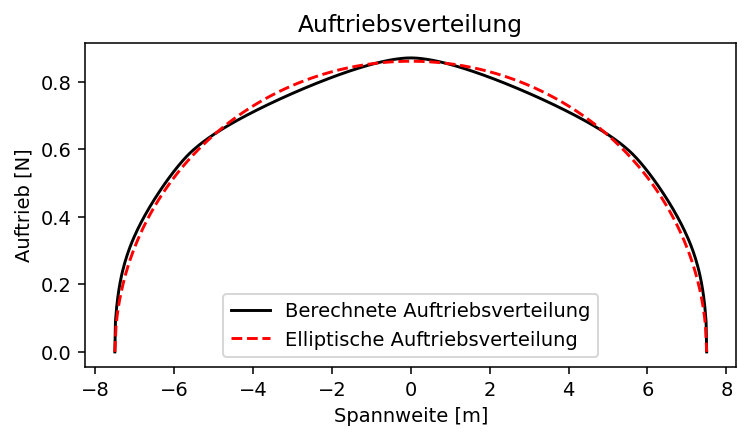

In [14]:
# Hinzufügen von Endpunkten zum plotten
A_j = np.insert(A_j, 0, 0)
A_j = np.append(A_j, 0)
y_c = np.insert(y_c, 0, -s)
y_c = np.append(y_c, s)

# Berechnen der Fläche unter der berechneten Auftriebsverteilung
area_distr = np.trapezoid(A_j, y_c)

# Erzeugen einer elliptischen Auftriebsverteilung
y_elliptisch = np.linspace(-s, s, len(y_c))
A_elliptisch_raw = np.sqrt(1 - (y_elliptisch / s) ** 2)

# Skalieren der elliptischen Verteilung, sodass die resultierende Auftriebskraft identisch ist
area_elliptisch_raw = np.trapezoid(A_elliptisch_raw, y_elliptisch)
scale_factor = area_distr / area_elliptisch_raw
A_elliptisch = A_elliptisch_raw * scale_factor

# Plotten der Auftriebsverteilungen
plt.figure(figsize=(6, 3))
plt.plot(y_c, A_j, '-', color="black", label='Berechnete Auftriebsverteilung')
plt.plot(y_elliptisch, A_elliptisch, '--', color="red", label='Elliptische Auftriebsverteilung')
plt.xlabel('Spannweite [m]')
plt.ylabel('Auftrieb [N]')
plt.title('Auftriebsverteilung')
plt.legend()
plt.show()

#### Aerodynamische Beiwerte und Oswald-Faktor

In [15]:
# Auftriebsbeiwert
C_A = 2*A / rho / U_inf**2 / S

# Widerstandsbeiwert (induziert)
C_W_ind = 2*W_ind / rho / U_inf**2 / S

# Induzierter Widerstand der elliptischen Zirkulationsverteilung
C_W_ind_ell = C_A**2 / AR / np.pi

# Oswald Faktor
Oswald = C_W_ind_ell / C_W_ind

print("Auftriebsbeiwert:            ", "%.5f" % C_A)
print("Widerstandsbeiwert:          ", "%.5f" % C_W_ind)
print("Widerstandsbeiwert (Ellipse):", "%.5f" % C_W_ind_ell)
print("Oswald-Faktor:               ", "%.3f" % Oswald)

Auftriebsbeiwert:             0.49048
Widerstandsbeiwert:           0.00468
Widerstandsbeiwert (Ellipse): 0.00383
Oswald-Faktor:                0.818


## **Aufgabe 1 c) Optimierung Doppeltrapezflügel**
Nehmen Sie die Werte `l_i` und `l_a` und `AR` des unter 1 b) gefundenen optimalen Trapezflügels, um daraus einen Doppeltrapezflügel zu erstellen, der bei 75% der Halbspannweite einen Knick in der Spitzung aufweist. Optimieren Sie einen Doppeltrapezflügel wie zuvor, diesmal über eine Variation der Flügeltiefenverteilung $\lambda = l_k/l_i$ am Knick.

In [16]:
# aus Aufgabe 1 b)
l_i = 1.0
l_a = 0.3
AR = 20

#### Iterationsschleife

In [17]:
# Initialisieren der benötigten Variablen
l_k_study = [0.3, 0.4, 0.5, 0.5, 0.6, 0.65, 0.66, 0.665, 0.67, 0.68, 0.685, 0.7, 0.8, 0.9, 1]
Oswald = []

# Iteration über verschiedene l_k
for l_k in l_k_study:
    
    # Berechnung der Halbspannweite, Kink-Position, Flügelfläche und Elementarflüelbreite
    b = AR * (l_k*0.75 + 0.5*(l_i-l_k)*0.75+l_a*(1-0.75)+0.5*(l_k-l_a)*0.25)   
    s = b / 2 
    y_lk = 0.75 * s     
    S = b**2 / AR    
    delta_b = b/ N

    # Berechnen aller Hufeisenwirbel-Koordinaten
    y_a, y_b, y_c, x_a, x_b, x_c, y_aoo, y_boo, x_aoo, x_boo = compute_coords(s, N, delta_b, l_i, l_k, l_a, y_lk) 

    # Berechnen der Anteile der Koeffizientenmatrix
    a_AB, a_Aoo, a_Boo = compute_coeff_matrices(y_a, y_b, y_c, x_a, x_b, x_c)

    # Berechnen von Koeffizientenmatrizen und Anstellwinkelvektor
    a = a_AB + a_Aoo - a_Boo              
    a_ind = a_Aoo - a_Boo                 
    alpha_g = np.full((a.shape[0]), alpha)  

    # Berechnen der Kräfte
    Gamma = np.linalg.solve(a, alpha_g * (- U_inf))
    A_j = rho * delta_b * U_inf * Gamma
    A = np.sum(A_j)
    w_ind = a_ind @ Gamma
    W_ind = np.sum(-rho *w_ind @ Gamma * delta_b)

    # Berechnen der Beiwerte
    C_A = 2*A / (rho * U_inf**2 * S)
    C_W_ind = 2*W_ind / (rho * U_inf**2 * S)
    C_W_ind_ell = C_A**2 / AR / np.pi

    # Berechnen des Oswald-Faktors
    Oswald.append(C_W_ind_ell / C_W_ind)

#### Ergebnisse visualisieren

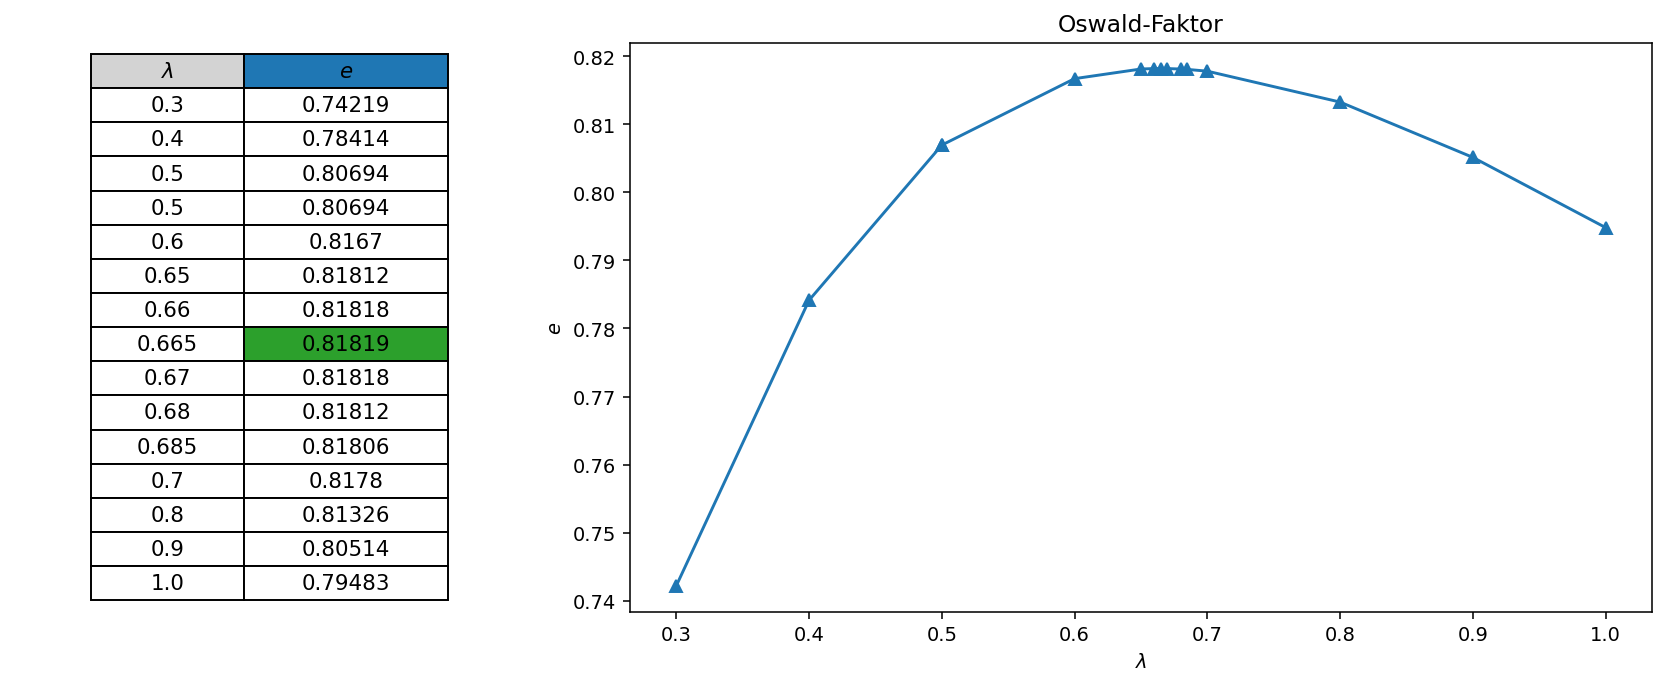

In [18]:
# Erstelle ein DataFrame
data = {
    r'$\lambda$': [round(num, 3) for num in l_k_study],
    r'$e$': [round(num, 5) for num in Oswald]
}
df = pd.DataFrame(data)

# Erstelle die Subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 2]})
colColours = ["lightgray", "C0"]

# Plot für Oswald
axs[1].plot(l_k_study, Oswald, marker='^', linestyle='-', color='C0')
axs[1].set_xlabel(r"$\lambda$")
axs[1].set_ylabel(r'$e$')
axs[1].set_title("Oswald-Faktor")

# Erstelle die Tabelle
axs[0].axis('tight')
axs[0].axis('off')
table = axs[0].table(cellText=df.values, colLabels=df.columns, colColours=colColours, 
                    colWidths= [0.3, 0.4], cellLoc='center', loc='center')

# Zell-Eigenschaften anpassen
for key, cell in table.get_celld().items():
    cell.set_height(0.06)
    cell.set_fontsize(11)
    cell.set_facecolor('white')

# Optimum hervorheben und Header Zeile wie plots färben
for i, color in enumerate(colColours):
    table[(0, i)].set_facecolor(color)
table[(8, 1)].set_facecolor('C2')

plt.tight_layout()
plt.show()

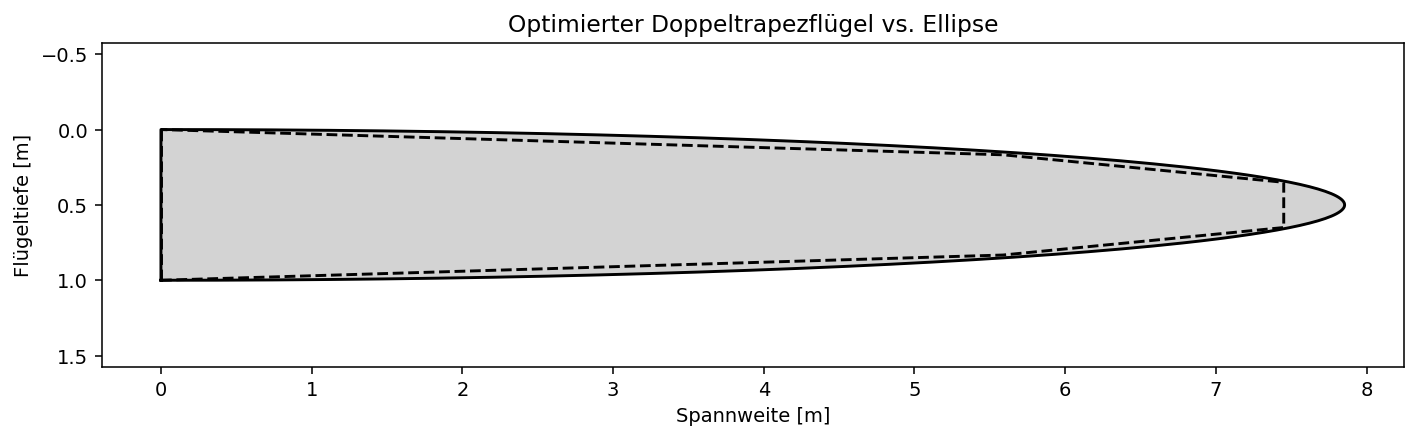

In [53]:
# Ergebnis der Optimierung
l_i = 1
l_k = 0.665
la = 0.3
AR = 20

# Flügeleckpunkte generieren
points_trpz = doppeltrapezfluegel(l_a, l_k, AR)
th = int(len(points_trpz) /  2 + 1)

# Berechnung der Ellipsenradien a, b sowie der Mittelpunkt-Koordinaten u, v
a = l_i / 2

# TODO gleiche Streckung oder gleiche Halbspannweite? 
# b = AR * (l_k*0.75 + 0.5*(l_i-l_k)*0.75+l_a*(1-0.75)+0.5*(l_k-l_a)*0.25) / 2
b = np.pi * AR * l_i / 8
u = 0.5
v = 0

# Parametrische Definition der Ellipse: x=u+a*cos(theta), y=v+b*sin(theta)
theta = np.linspace(0, np.pi, 200)
points_ell = np.column_stack((v+b*np.sin(theta), u+a*np.cos(theta)))
points_ell = np.vstack((points_ell, np.array([0, 1])))

# Geometrie plotten
plt.figure(figsize=(12, 3))
plt.plot(points_trpz[:th,0], points_trpz[:th, 1], '--', color="black")
plt.plot(points_ell[:,0], points_ell[:,1], "-", color="black")
plt.fill(points_ell[:,0], points_ell[:,1], color="lightgrey")
plt.vlines(0, 0, 1, "black", "--")
plt.xlabel('Spannweite [m]')
plt.ylabel('Flügeltiefe [m]')
plt.title('Optimierter Doppeltrapezflügel vs. Ellipse')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()